In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from scipy.stats import boxcox
import tensorflow as tf
import tensorflow_decision_forests as tfdf


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler


ModuleNotFoundError: No module named 'tensorflow.python'

In [161]:
df = pd.read_csv("data_sintetis_kambing_timestamp2.csv")

In [162]:
df

,Timestamp,Suhu,Saturasi_Oksigen,Detak_Jantung
0,2024-01-24 17:46:35.523776,38.741186,95.621099,73.898547
1,2024-01-24 17:47:35.523776,38.429235,95.396557,76.994027
2,2024-01-24 17:48:35.523776,38.827059,90.394797,72.301569
3,2024-01-24 17:49:35.523776,39.308858,96.408662,81.094074
4,2024-01-24 17:50:35.523776,38.345562,91.262581,93.935152
...,...,...,...,...
4995,2024-01-28 05:01:35.531369,38.494909,94.484097,68.594328
4996,2024-01-28 05:02:35.531369,38.924574,92.139203,98.149926
4997,2024-01-28 05:03:35.531369,40.075373,97.198020,91.116611
4998,2024-01-28 05:04:35.531369,38.989695,97.366845,63.589481


In [163]:
print("Duplicate values in training data is: ",df.duplicated().sum())
print("Duplicate values in testing data is: ",df.duplicated().sum())


Duplicate values in training data is:  0
Duplicate values in testing data is:  0


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Timestamp         5000 non-null   object 
 1   Suhu              5000 non-null   float64
 2   Saturasi_Oksigen  5000 non-null   float64
 3   Detak_Jantung     5000 non-null   float64
dtypes: float64(3), object(1)
memory usage: 156.4+ KB


In [165]:
df.describe()

,Suhu,Saturasi_Oksigen,Detak_Jantung
count,5000.000000,5000.000000,5000.000000
mean,38.503627,94.935069,80.079237
std,0.500830,3.114019,10.672354
min,36.841940,82.975529,41.806179
25%,38.168283,92.776312,73.100300
50%,38.510045,94.946818,79.864580
75%,38.839727,97.054008,87.342299
max,40.461713,106.205655,120.817519


In [166]:
train,test = train_test_split(df, test_size=0.3, random_state=1 )

In [167]:
def kategori_kambing(row):
    if (38.5 <= row['Suhu'] <= 40) and (70 <= row['Detak_Jantung'] <= 90) and (95 <= row['Saturasi_Oksigen'] <= 100):
        return 'Sehat'
    elif (38.5 >= row['Suhu'] or row['Suhu'] >= 40) and (70 >= row['Detak_Jantung'] or row['Detak_Jantung'] >= 90) and (95 >= row['Saturasi_Oksigen'] or row['Saturasi_Oksigen'] >= 100):
        return 'Suhu,detak jantung, dan saturasi oksigen tidak normal'
    elif (38.5 >=row['Suhu'] or 40 <= row['Suhu']) and (70 >= row['Detak_Jantung'] or 90 <= row['Detak_Jantung']):
        return 'Suhu dan detak jantung tidak normal'
    elif (38.5 >=row['Suhu'] or 40 <= row['Suhu']) and (95 >=row['Saturasi_Oksigen'] or 100 <= row['Saturasi_Oksigen']):
        return 'Suhu dan saturasi oksigen tidak normal'
    elif (38.5 >=row['Suhu'] or 40 <= row['Suhu']):
        return 'Suhu tidak normal'
    elif (70 >=row['Detak_Jantung'] or 90 <= row['Detak_Jantung']) and (95 >=row['Saturasi_Oksigen'] or 100 <= row['Saturasi_Oksigen']):
        return 'Detak jantung dan saturasi oksigen tidak normal'
    elif  (70 >=row['Detak_Jantung'] or 90 <= row['Detak_Jantung']):
        return 'Detak Jantung tidak normal'
    elif (95 >=row['Saturasi_Oksigen'] or 100 <= row['Saturasi_Oksigen']):
        return 'Saturasi oksigen tidak normal'
    else:
        return '-'

# Menambahkan kolom kategori
train['Kategori'] = train.apply(kategori_kambing, axis=1)

In [168]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3500 entries, 1334 to 235
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Timestamp         3500 non-null   object 
 1   Suhu              3500 non-null   float64
 2   Saturasi_Oksigen  3500 non-null   float64
 3   Detak_Jantung     3500 non-null   float64
 4   Kategori          3500 non-null   object 
dtypes: float64(3), object(2)
memory usage: 164.1+ KB


In [169]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 2764 to 1458
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Timestamp         1500 non-null   object 
 1   Suhu              1500 non-null   float64
 2   Saturasi_Oksigen  1500 non-null   float64
 3   Detak_Jantung     1500 non-null   float64
dtypes: float64(3), object(1)
memory usage: 58.6+ KB


In [170]:
train['Detak_Jantung'].sort_values(ascending=True)

1180     42.635544
3582     44.755934
1393     45.600601
1486     46.161941
217      46.215607
           ...    
4912    111.967199
1628    115.588220
1338    115.681044
3225    115.760709
1464    120.817519
Name: Detak_Jantung, Length: 3500, dtype: float64

In [171]:
jumlah_suhu_ideal = ((train['Suhu'] >= 38.5) & (train['Suhu'] <= 40)).sum()
jumlah_sat_ideal = ((train['Saturasi_Oksigen'] >= 95) & (train['Suhu'] <= 100)).sum()
jumlah_detak_ideal = ((train['Detak_Jantung'] >= 70) & (train['Detak_Jantung'] <= 90)).sum()

In [172]:
print("Jumlah suhu ideal di data",jumlah_suhu_ideal,"Jumlah saturasi ideal di data",jumlah_sat_ideal,"jumlah_detak_ideal didata",jumlah_detak_ideal)

Jumlah suhu ideal di data 1724 Jumlah saturasi ideal di data 1749 jumlah_detak_ideal didata 2289


In [173]:
sensor = ['Suhu', 'Saturasi_Oksigen', 'Detak_Jantung']

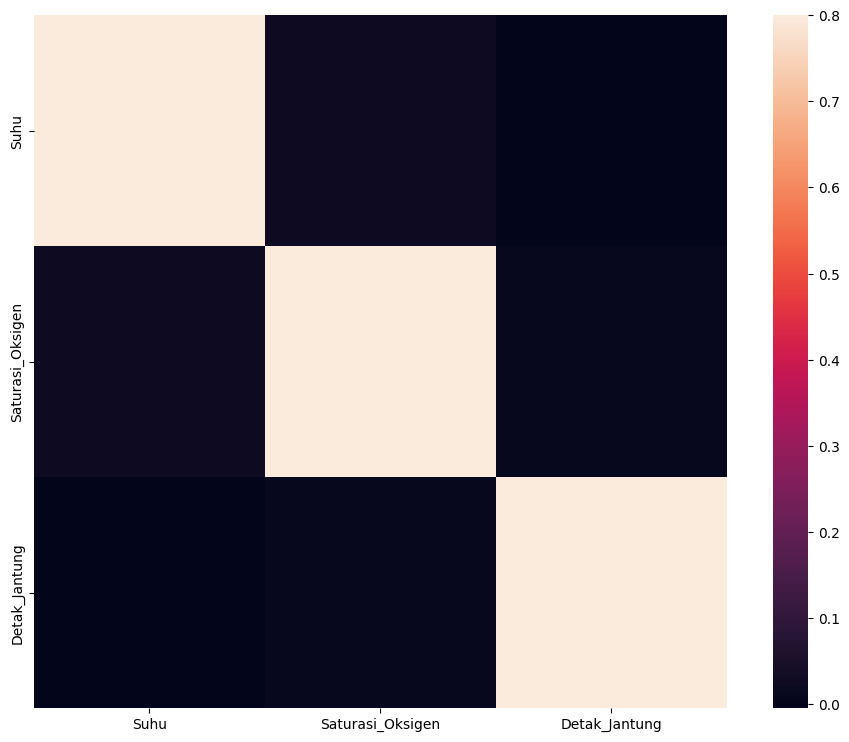

In [174]:
corrmat = train[sensor].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

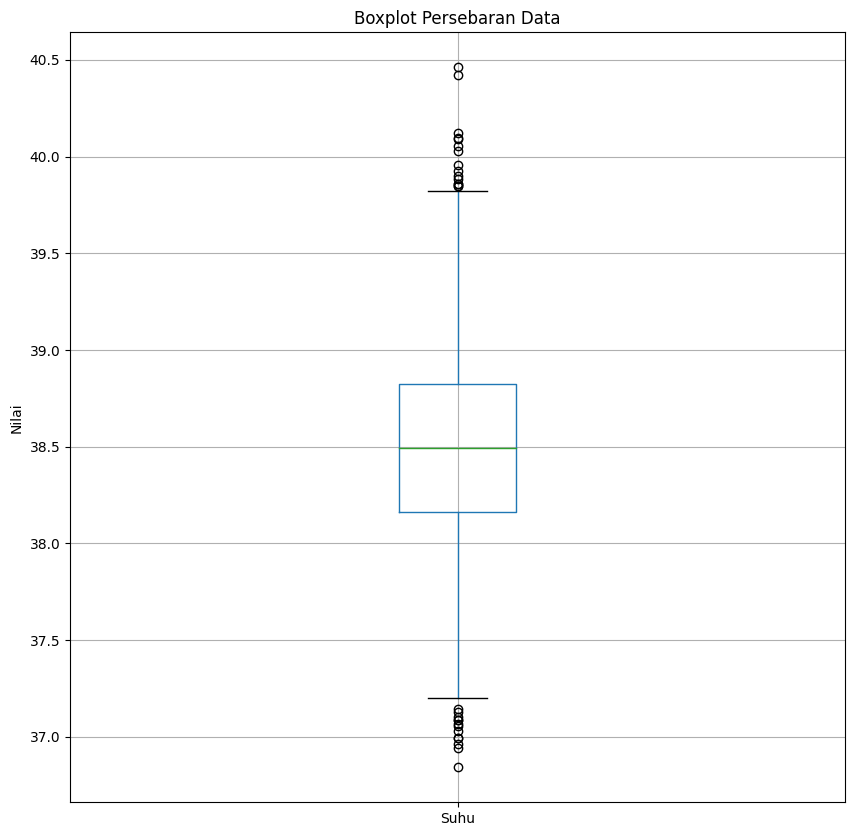

In [175]:
plt.figure(figsize=(10, 10))
train.boxplot(column=['Suhu'])

# Menambahkan label
plt.title('Boxplot Persebaran Data')
plt.ylabel('Nilai')

# Tampilkan boxplot
plt.show()

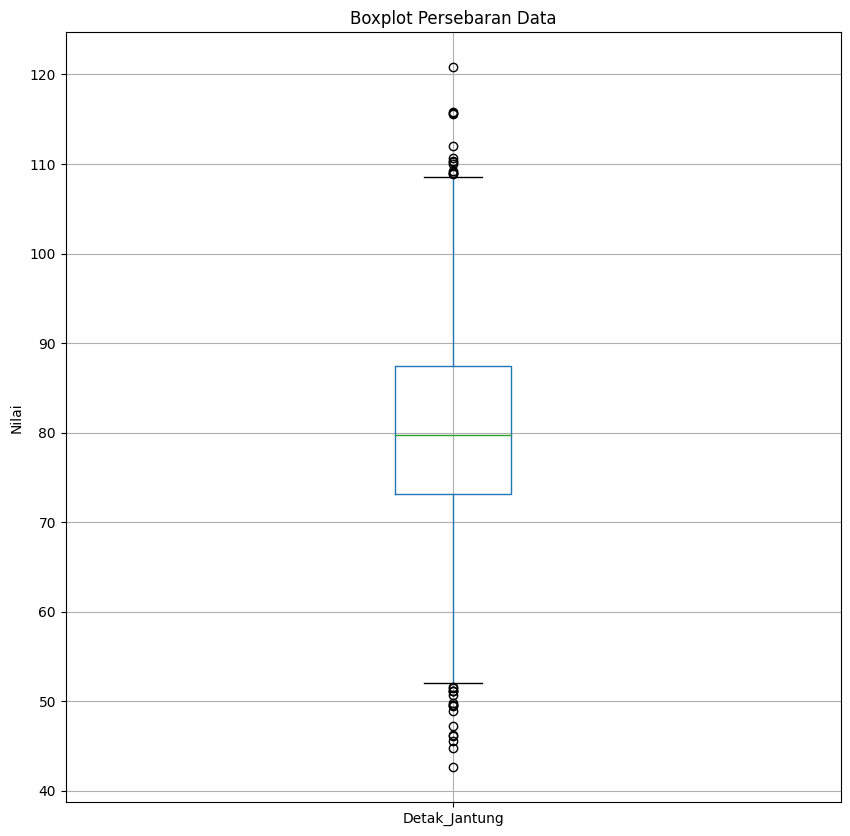

In [176]:
plt.figure(figsize=(10, 10))
train.boxplot(column=['Detak_Jantung'])

# Menambahkan label
plt.title('Boxplot Persebaran Data')
plt.ylabel('Nilai')

# Tampilkan boxplot
plt.show()

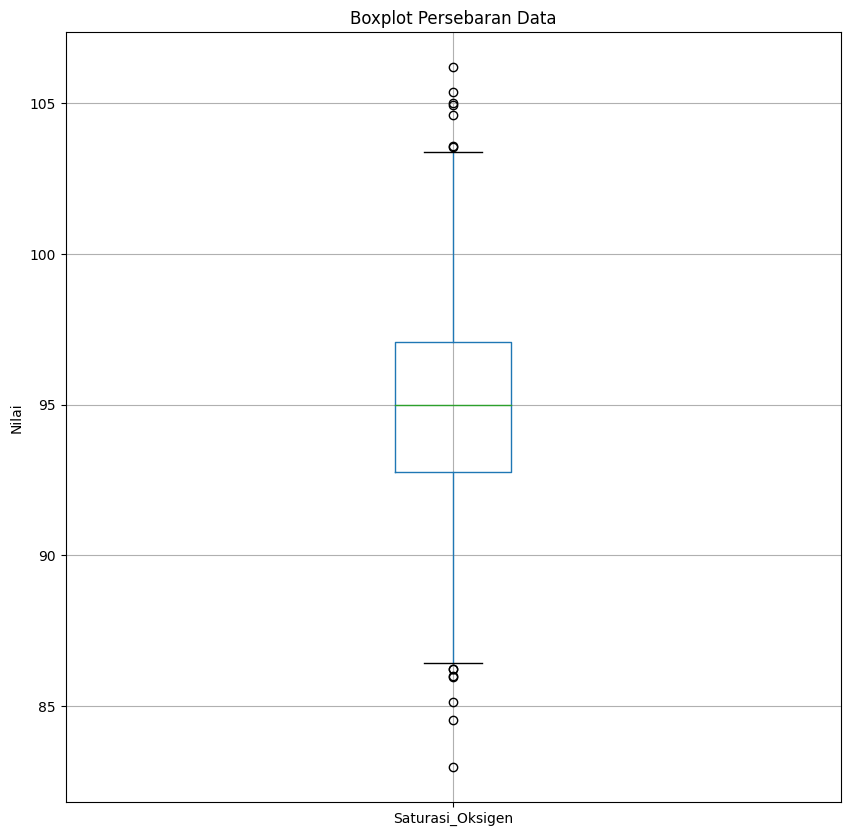

In [177]:
plt.figure(figsize=(10, 10))
train.boxplot(column=['Saturasi_Oksigen'])

# Menambahkan label
plt.title('Boxplot Persebaran Data')
plt.ylabel('Nilai')

# Tampilkan boxplot
plt.show()

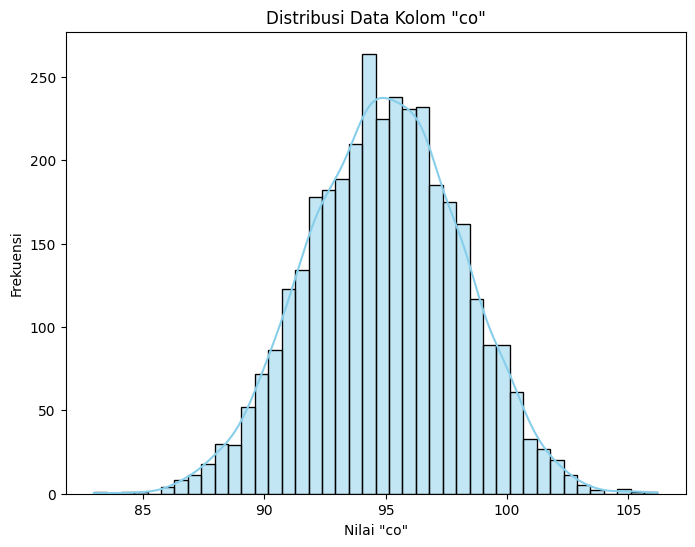

In [178]:
plt.figure(figsize=(8, 6))
sns.histplot(train['Saturasi_Oksigen'], kde=True, color='skyblue')
plt.title('Distribusi Data Kolom "co"')
plt.xlabel('Nilai "co"')
plt.ylabel('Frekuensi')
plt.show()

In [179]:
train[sensor].skew()

Suhu                0.031675
Saturasi_Oksigen   -0.038905
Detak_Jantung      -0.006554
dtype: float64

In [180]:
def outlierr(column_name):
    Q1=train[column_name].quantile(0.25)
    Q3=train[column_name].quantile(0.75)
    IQR=Q3-Q1
    print(Q1)
    print(Q3)
    print(IQR)
    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    print(Lower_Whisker, Upper_Whisker)

In [181]:
def outlieratas(column_name):
    Q1=df[column_name].quantile(0.25)
    Q3=df[column_name].quantile(0.75)
    IQR=Q3-Q1
    Upper_Whisker = Q3+1.5*IQR
    return Upper_Whisker


In [182]:
def outlierbawah(column_name):
    Q1=df[column_name].quantile(0.25)
    Q3=df[column_name].quantile(0.75)
    IQR=Q3-Q1
    Lower_Whisker = Q1-1.5*IQR
    return Lower_Whisker

In [183]:
train[train['Detak_Jantung']<outlierbawah('Detak_Jantung')]

,Timestamp,Suhu,Saturasi_Oksigen,Detak_Jantung,Kategori
2686,2024-01-26 14:32:35.527383,38.706192,96.584872,47.185791,Detak Jantung tidak normal
3540,2024-01-27 04:46:35.529411,38.663539,95.908643,49.470108,Detak Jantung tidak normal
3582,2024-01-27 05:28:35.529411,39.428769,94.562717,44.755934,Detak jantung dan saturasi oksigen tidak normal
3746,2024-01-27 08:12:35.529411,37.426297,96.640615,49.784131,Suhu dan detak jantung tidak normal
1747,2024-01-25 22:53:35.526334,38.838622,92.161679,51.534918,Detak jantung dan saturasi oksigen tidak normal
217,2024-01-24 21:23:35.523776,38.357230,94.498730,46.215607,"Suhu,detak jantung, dan saturasi oksigen tidak..."
1951,2024-01-26 02:17:35.527383,39.123517,99.460949,51.094599,Detak Jantung tidak normal
766,2024-01-25 06:32:35.525284,38.481712,95.380861,48.888275,Suhu dan detak jantung tidak normal
3436,2024-01-27 03:02:35.528333,38.796227,95.908831,50.687030,Detak Jantung tidak normal
980,2024-01-25 10:06:35.525284,38.792753,101.542490,51.518281,Detak jantung dan saturasi oksigen tidak normal


In [184]:
train = train[train['Detak_Jantung'] > outlierbawah('Detak_Jantung')]


In [185]:
train[train['Detak_Jantung']>outlieratas('Detak_Jantung')]

,Timestamp,Suhu,Saturasi_Oksigen,Detak_Jantung,Kategori
3748,2024-01-27 08:14:35.529411,39.249192,95.378791,110.246982,Detak Jantung tidak normal
1338,2024-01-25 16:04:35.526334,38.294869,96.519746,115.681044,Suhu dan detak jantung tidak normal
3225,2024-01-26 23:31:35.528333,37.951526,95.472057,115.760709,Suhu dan detak jantung tidak normal
581,2024-01-25 03:27:35.525284,38.306036,92.889748,110.321399,"Suhu,detak jantung, dan saturasi oksigen tidak..."
1611,2024-01-25 20:37:35.526334,37.700781,101.049332,109.178683,"Suhu,detak jantung, dan saturasi oksigen tidak..."
1226,2024-01-25 14:12:35.526334,38.612907,90.226628,110.662300,Detak jantung dan saturasi oksigen tidak normal
1628,2024-01-25 20:54:35.526334,38.605829,91.204370,115.588220,Detak jantung dan saturasi oksigen tidak normal
3948,2024-01-27 11:34:35.529411,38.326135,97.687902,108.854338,Suhu dan detak jantung tidak normal
3518,2024-01-27 04:24:35.528333,39.137964,94.449954,108.996080,Detak jantung dan saturasi oksigen tidak normal
2381,2024-01-26 09:27:35.527383,37.912563,95.455378,108.958106,Suhu dan detak jantung tidak normal


In [186]:
train = train[train['Detak_Jantung'] < outlieratas('Detak_Jantung')]


In [187]:
train[train['Saturasi_Oksigen']<outlierbawah('Saturasi_Oksigen')]

,Timestamp,Suhu,Saturasi_Oksigen,Detak_Jantung,Kategori
340,2024-01-24 23:26:35.523776,38.146537,85.968321,74.713026,Suhu dan saturasi oksigen tidak normal
777,2024-01-25 06:43:35.525284,38.369813,86.217852,64.704119,"Suhu,detak jantung, dan saturasi oksigen tidak..."
4688,2024-01-27 23:54:35.530410,37.795874,86.010061,82.069121,Suhu dan saturasi oksigen tidak normal
1421,2024-01-25 17:27:35.526334,39.092181,84.539324,84.137318,Saturasi oksigen tidak normal
2494,2024-01-26 11:20:35.527383,37.844518,82.975529,86.809011,Suhu dan saturasi oksigen tidak normal
2085,2024-01-26 04:31:35.527383,37.921118,86.242478,98.353555,"Suhu,detak jantung, dan saturasi oksigen tidak..."
4611,2024-01-27 22:37:35.530410,37.502149,85.150591,81.705602,Suhu dan saturasi oksigen tidak normal


In [188]:
train = train[train['Saturasi_Oksigen'] > outlierbawah('Saturasi_Oksigen')]


In [189]:
train[train['Suhu']<outlierbawah('Suhu')]

,Timestamp,Suhu,Saturasi_Oksigen,Detak_Jantung,Kategori
262,2024-01-24 22:08:35.523776,36.940111,97.656456,92.488426,Suhu dan detak jantung tidak normal
1101,2024-01-25 12:07:35.526334,37.087217,94.444505,69.737049,"Suhu,detak jantung, dan saturasi oksigen tidak..."
3017,2024-01-26 20:03:35.528333,36.991847,94.173801,91.259462,"Suhu,detak jantung, dan saturasi oksigen tidak..."
3405,2024-01-27 02:31:35.528333,37.085075,89.931688,77.029174,Suhu dan saturasi oksigen tidak normal
4033,2024-01-27 12:59:35.529411,36.964549,87.341523,64.793035,"Suhu,detak jantung, dan saturasi oksigen tidak..."
1539,2024-01-25 19:25:35.526334,36.991713,91.949112,96.078046,"Suhu,detak jantung, dan saturasi oksigen tidak..."
4207,2024-01-27 15:53:35.530410,37.053922,93.937509,75.245628,Suhu dan saturasi oksigen tidak normal
4639,2024-01-27 23:05:35.530410,37.063629,94.697081,77.299360,Suhu dan saturasi oksigen tidak normal
4725,2024-01-28 00:31:35.531369,36.841940,94.261405,102.173747,"Suhu,detak jantung, dan saturasi oksigen tidak..."
1591,2024-01-25 20:17:35.526334,37.103911,87.846043,64.840806,"Suhu,detak jantung, dan saturasi oksigen tidak..."


In [190]:
train['Kategori'].unique()

array(['Detak jantung dan saturasi oksigen tidak normal',
       'Saturasi oksigen tidak normal',
       'Suhu dan saturasi oksigen tidak normal', 'Suhu tidak normal',
       'Sehat', 'Detak Jantung tidak normal',
       'Suhu,detak jantung, dan saturasi oksigen tidak normal',
       'Suhu dan detak jantung tidak normal'], dtype=object)

In [191]:
scaler = StandardScaler()

In [192]:
labelenc = LabelEncoder()

In [193]:
train['Kategori'] = labelenc.fit_transform(train['Kategori'])
train['Kategori'].unique()

array([1, 2, 5, 6, 3, 0, 7, 4])

0 = Detak jantung dan saturasi oksigen tidak normal > 1

1 = Saturasi oksigen tidak normal > 2

2 = Suhu dan saturasi oksigen tidak normal > 5

3 = Suhu tidak normal > 6

4 = Sehat > 3

5 = Detak Jantung tidak normal > 0

6 = Suhu,detak jantung, dan saturasi oksigen tidak normal > 7

7 = Suhu dan detak jantung tidak normal > 4

In [194]:
train

,Timestamp,Suhu,Saturasi_Oksigen,Detak_Jantung,Kategori
1334,2024-01-25 16:00:35.526334,38.609238,91.860582,67.063170,1
4768,2024-01-28 01:14:35.531369,39.062642,94.719891,66.905926,1
65,2024-01-24 18:51:35.523776,39.210644,89.541798,75.130105,2
177,2024-01-24 20:43:35.523776,39.252099,92.970502,80.659298,2
4489,2024-01-27 20:35:35.530410,38.500546,94.482935,64.202160,1
...,...,...,...,...,...
2895,2024-01-26 18:01:35.528333,40.461713,97.828023,93.559316,4
2763,2024-01-26 15:49:35.527383,38.258842,101.530408,78.214470,5
905,2024-01-25 08:51:35.525284,38.482854,92.650963,57.157497,7
3980,2024-01-27 12:06:35.529411,39.207309,96.627619,87.918405,3


In [195]:
X = train.drop(columns=["Timestamp","Kategori"])
y = train[["Kategori"]]

In [196]:
testb = test.drop(columns=["Timestamp"])


In [197]:
X

,Suhu,Saturasi_Oksigen,Detak_Jantung
1334,38.609238,91.860582,67.063170
4768,39.062642,94.719891,66.905926
65,39.210644,89.541798,75.130105
177,39.252099,92.970502,80.659298
4489,38.500546,94.482935,64.202160
...,...,...,...
2895,40.461713,97.828023,93.559316
2763,38.258842,101.530408,78.214470
905,38.482854,92.650963,57.157497
3980,39.207309,96.627619,87.918405


In [198]:
X_scaled = scaler.fit_transform(X)
test_df_scaled = scaler.fit_transform(testb)

In [199]:
X_scaled

array([[ 0.23289623, -1.00039792, -1.28016768],
       [ 1.14542913, -0.07896741, -1.2955831 ],
       [ 1.44330297, -1.74764124, -0.48932291],
       ...,
       [-0.02146655, -0.74569269, -2.25127369],
       [ 1.4365908 ,  0.53581019,  0.76438247],
       [ 0.6704868 ,  0.71419282,  0.19761806]])

In [200]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [201]:
print(x_train.shape, y_train.shape)

(2770, 3) (2770, 1)


In [202]:
print(x_test.shape,y_test.shape)

(693, 3) (693, 1)


In [203]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [204]:
print(x_train1.shape, y_train1.shape)

(2770, 3) (2770, 1)


In [205]:
print(x_test1.shape, y_test1.shape)

(693, 3) (693, 1)


In [206]:
training_score = []
testing_score = []

In [207]:
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test1,x_test_pred1,average='macro'))
    print(f"Recall Score of {model} model is:",recall_score(y_test1,x_test_pred1,average='macro'))
    print(f"F1 Score of {model} model is:",f1_score(y_test1,x_test_pred1,average='macro'))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 99.71139971139971

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier() model is: 0.9954530423280423
Recall Score of DecisionTreeClassifier() model is: 0.9960404483430799
F1 Score of DecisionTreeClassifier() model is: 0.9957312444895225

------------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier() model is:


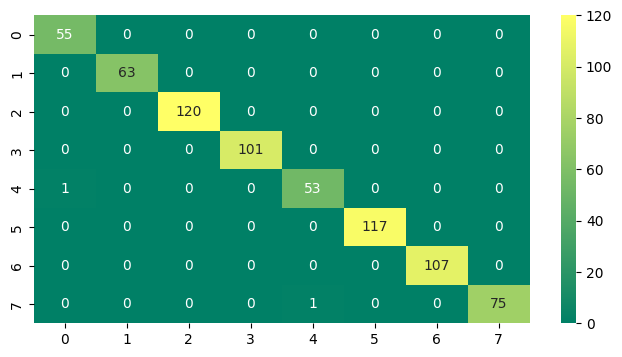

In [208]:
model_prediction(DecisionTreeClassifier())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19772\517314366.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train1,y_train1)


Accuracy_Score of RandomForestClassifier() model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 99.85569985569985

------------------------------------------------------------------------
Precision Score of RandomForestClassifier() model is: 0.9977678571428572
Recall Score of RandomForestClassifier() model is: 0.9976851851851851
F1 Score of RandomForestClassifier() model is: 0.9977056495748085

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


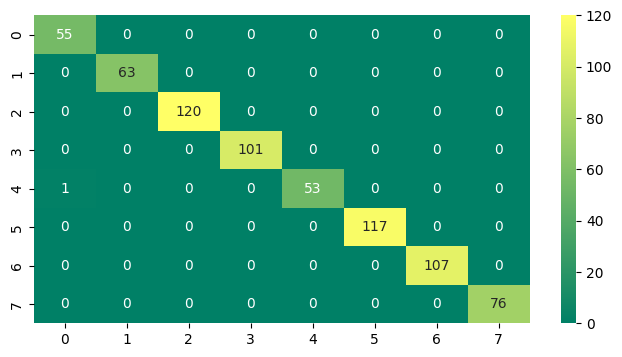

In [209]:
model_prediction(RandomForestClassifier())

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy_Score of GaussianNB() model on Training Data is: 89.45848375451263
Accuracy_Score of GaussianNB() model on Testing Data is: 88.88888888888889

------------------------------------------------------------------------
Precision Score of GaussianNB() model is: 0.8970638774138574
Recall Score of GaussianNB() model is: 0.8701838542875268
F1 Score of GaussianNB() model is: 0.879953954556693

------------------------------------------------------------------------
Confusion Matrix of GaussianNB() model is:


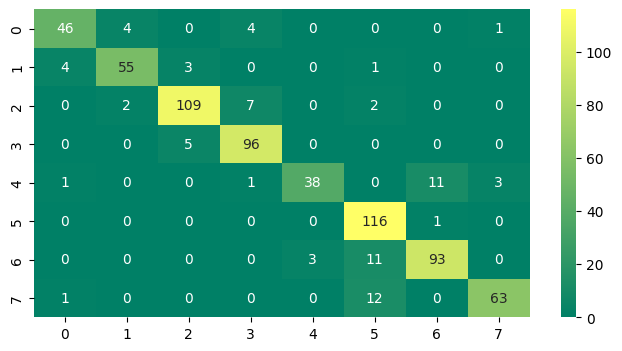

In [210]:
model_prediction(GaussianNB())

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy_Score of KNeighborsClassifier() model on Training Data is: 93.86281588447653
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 90.33189033189034

------------------------------------------------------------------------
Precision Score of KNeighborsClassifier() model is: 0.8951136439526532
Recall Score of KNeighborsClassifier() model is: 0.8891312806899013
F1 Score of KNeighborsClassifier() model is: 0.8912389131481844

------------------------------------------------------------------------
Confusion Matrix of KNeighborsClassifier() model is:


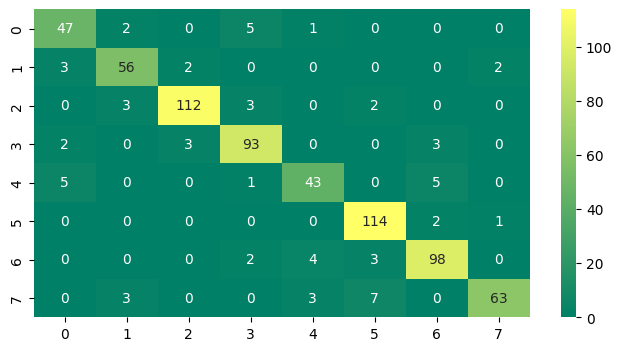

In [211]:
model_prediction(KNeighborsClassifier())

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy_Score of AdaBoostClassifier() model on Training Data is: 36.8231046931408
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 34.1991341991342

------------------------------------------------------------------------
Precision Score of AdaBoostClassifier() model is: 0.08556134693265337
Recall Score of AdaBoostClassifier() model is: 0.25
F1 Score of AdaBoostClassifier() model is: 0.12746138795220846

------------------------------------------------------------------------
Confusion Matrix of AdaBoostClassifier() model is:


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


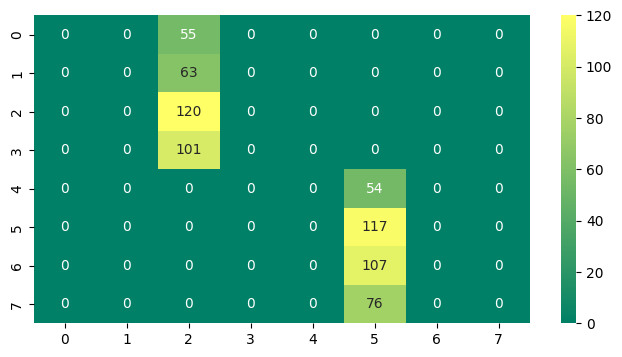

In [212]:
model_prediction(AdaBoostClassifier())


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 100.0
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 99.27849927849928

------------------------------------------------------------------------
Precision Score of GradientBoostingClassifier() model is: 0.9910056422912531
Recall Score of GradientBoostingClassifier() model is: 0.9917503215282006
F1 Score of GradientBoostingClassifier() model is: 0.9913094491171395

------------------------------------------------------------------------
Confusion Matrix of GradientBoostingClassifier() model is:


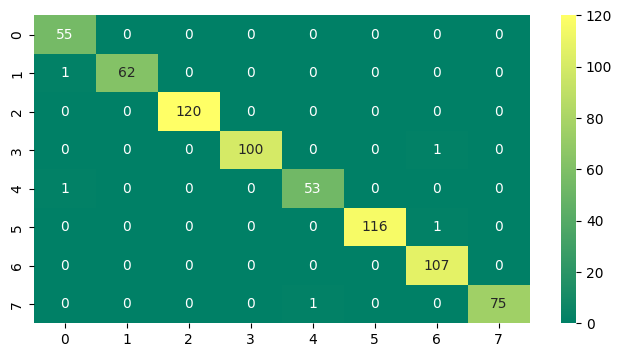

In [213]:
model_prediction(GradientBoostingClassifier())

In [214]:
model = RandomForestClassifier()

In [215]:
model.fit(x_train,y_train)
pred1 = model.predict(x_test)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19772\1753296610.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


In [216]:
print(testb.shape,x_train.shape)

(1500, 3) (2770, 3)


In [217]:
pred = model.predict(testb)


In [218]:
pred

array([2, 4, 5, ..., 7, 2, 2])

In [219]:
testb["Kategori"]= pred

In [220]:
testb[testb["Kategori"]==1]

,Suhu,Saturasi_Oksigen,Detak_Jantung,Kategori
3670,39.051390,94.504200,92.353403,1
3185,39.134184,89.983161,98.513046,1
4377,39.520234,93.513945,98.082064,1
1441,39.153510,94.475251,64.860960,1
3743,38.614083,100.516694,69.189183,1
...,...,...,...,...
2270,38.613372,89.540758,56.077449,1
1049,39.114148,90.657831,108.195660,1
3167,38.602075,91.989587,53.350806,1
1550,38.513626,94.128301,92.465239,1


In [221]:
df2= pd.read_csv("data_sintetis_kambing_timestamp5.csv")

In [222]:
df2

,Timestamp,Suhu,Saturasi_Oksigen,Detak_Jantung
0,2024-01-27 12:22:33.670257,38.925003,90.484693,80.763157
1,2024-01-27 12:23:33.670257,38.345408,90.339940,82.898270
2,2024-01-27 12:24:33.670257,39.179836,87.229139,79.524867
3,2024-01-27 12:25:33.670257,40.496461,90.994123,85.765346
4,2024-01-27 12:26:33.670257,37.892238,87.386249,94.852775
...,...,...,...,...
4995,2024-01-30 23:37:33.677256,38.644949,89.439214,76.900572
4996,2024-01-30 23:38:33.677256,39.900094,88.425859,97.993869
4997,2024-01-30 23:39:33.677256,41.802087,91.582899,92.681354
4998,2024-01-30 23:40:33.677256,40.164801,91.495269,73.134166


In [223]:
df2.drop(columns="Timestamp",inplace=True)

In [224]:
df2

,Suhu,Saturasi_Oksigen,Detak_Jantung
0,38.925003,90.484693,80.763157
1,38.345408,90.339940,82.898270
2,39.179836,87.229139,79.524867
3,40.496461,90.994123,85.765346
4,37.892238,87.386249,94.852775
...,...,...,...
4995,38.644949,89.439214,76.900572
4996,39.900094,88.425859,97.993869
4997,41.802087,91.582899,92.681354
4998,40.164801,91.495269,73.134166


In [225]:
kat = model.predict(df2)

In [226]:
df2['Kategori'] = kat

In [227]:
df2

,Suhu,Saturasi_Oksigen,Detak_Jantung,Kategori
0,38.925003,90.484693,80.763157,2
1,38.345408,90.339940,82.898270,5
2,39.179836,87.229139,79.524867,2
3,40.496461,90.994123,85.765346,5
4,37.892238,87.386249,94.852775,7
...,...,...,...,...
4995,38.644949,89.439214,76.900572,2
4996,39.900094,88.425859,97.993869,1
4997,41.802087,91.582899,92.681354,1
4998,40.164801,91.495269,73.134166,5


0 = Detak jantung dan saturasi oksigen tidak normal > 1

1 = Saturasi oksigen tidak normal > 2

2 = Suhu dan saturasi oksigen tidak normal > 5

3 = Suhu tidak normal > 6

4 = Sehat > 3

5 = Detak Jantung tidak normal > 0

6 = Suhu,detak jantung, dan saturasi oksigen tidak normal > 7

7 = Suhu dan detak jantung tidak normal > 4

In [228]:
keterangan_mapping = {
    1 : 'Detak jantung dan saturasi oksigen tidak normal',
    2 : 'Saturasi oksigen tidak normal',
    5 : 'Suhu dan saturasi oksigen tidak normal',
    6 : 'Suhu tidak normal',
    3 : 'Sehat',
    0 : 'Detak Jantung tidak normal',
    7 : 'Suhu,detak jantung, dan saturasi oksigen tidak normal',
    4 : 'Suhu dan detak jantung tidak normal'
}

In [229]:
df2['Kategori'] = df2['Kategori'].map(keterangan_mapping)

In [230]:
df2

,Suhu,Saturasi_Oksigen,Detak_Jantung,Kategori
0,38.925003,90.484693,80.763157,Saturasi oksigen tidak normal
1,38.345408,90.339940,82.898270,Suhu dan saturasi oksigen tidak normal
2,39.179836,87.229139,79.524867,Saturasi oksigen tidak normal
3,40.496461,90.994123,85.765346,Suhu dan saturasi oksigen tidak normal
4,37.892238,87.386249,94.852775,"Suhu,detak jantung, dan saturasi oksigen tidak..."
...,...,...,...,...
4995,38.644949,89.439214,76.900572,Saturasi oksigen tidak normal
4996,39.900094,88.425859,97.993869,Detak jantung dan saturasi oksigen tidak normal
4997,41.802087,91.582899,92.681354,Detak jantung dan saturasi oksigen tidak normal
4998,40.164801,91.495269,73.134166,Suhu dan saturasi oksigen tidak normal


In [231]:
savemodel = model  

In [236]:
savemodel = tf.keras.models.load_model('my_model.h5')


AttributeError: module 'tensorflow' has no attribute 'keras'